# Fraudulent Credit Card Transactions Detection¶

In [74]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

In [75]:
df = pd.read_csv("creditcard.csv")

In [76]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [77]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [78]:
# check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Class Distribution

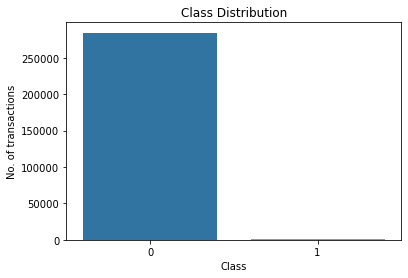

In [79]:
sns.countplot(x = 'Class', data = df)
# df["Class"].value_counts().plot(kind = "bar")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("No. of transactions")
plt.show()

Out of 284807 transactions, only 492 are fraudulent. Thus, the dataset is highly imbalanced.

# Feature Correlation Map

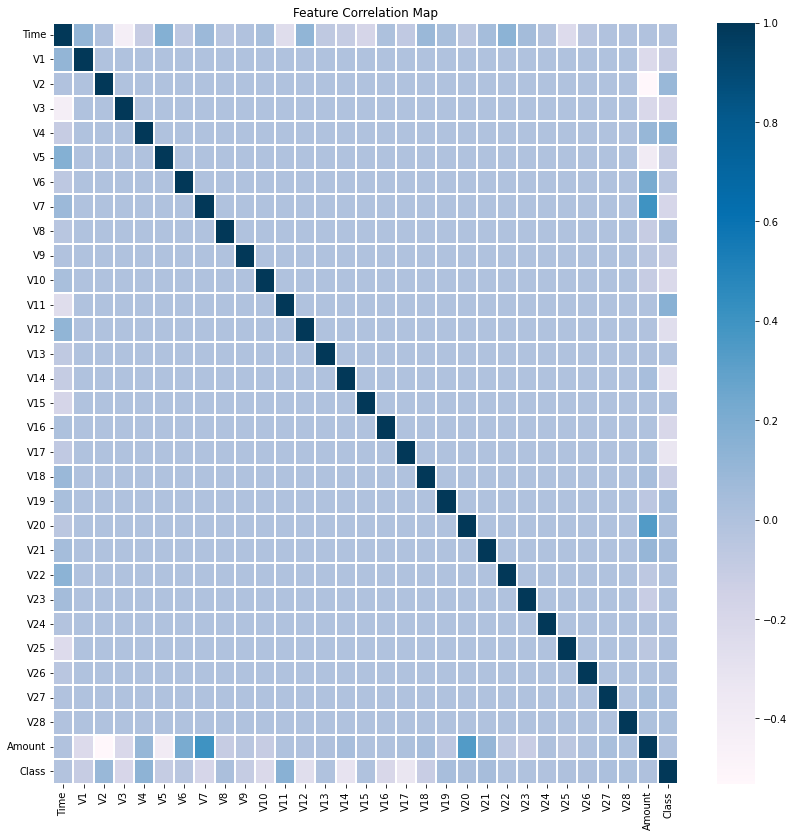

In [80]:
# feature correlation map
plt.figure(figsize = (14, 14))
plt.title("Feature Correlation Map")
corr = df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = .1, cmap = "PuBu")
plt.show()

# Observations:

* There is no notable correlation between features V1 to V28.
* Time has inverse correlation with V3.
* Amount has direct correlation with V7 & V20 and inverse correlation with V2 & V5.

In [81]:
# define predictors and target 
target = "Class"
# all columns except class
predictors = df.columns.tolist()[:-1]

In [82]:
# split the data
train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 42, shuffle = True)
train_df, valid_df = train_test_split(train_df, test_size = 0.2, random_state = 42, shuffle = True)

In [83]:
x_train, x_valid, x_test = train_df[predictors], valid_df[predictors], test_df[predictors]
y_train, y_valid, y_test = train_df[target].values, valid_df[target].values, test_df[target].values

# Random Forest

In [84]:
clf = RandomForestClassifier(n_jobs = 4,
                             random_state = 42,
                             criterion = "gini",
                             n_estimators = 100,
                             verbose = False)

In [85]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=42, verbose=False)

In [86]:
preds = clf.predict(valid_df[predictors])

In [87]:
# clf.score(test_df[predictors], test_df[target].values)

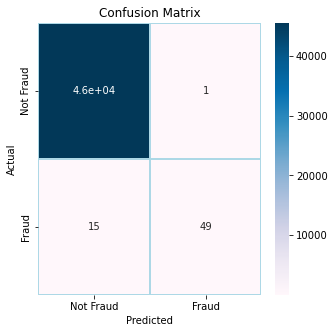

In [88]:
# confusion matrix
cm = pd.crosstab(valid_df[target].values, preds, rownames = ['Actual'], colnames = ['Predicted'])
fig, ax1 = plt.subplots(ncols = 1, figsize = (5, 5))
sns.heatmap(cm, xticklabels = ["Not Fraud", "Fraud"], yticklabels = ["Not Fraud", "Fraud"], annot = True, ax = ax1, linewidth = .2, linecolor = "Lightblue", cmap = "PuBu")
plt.title("Confusion Matrix")
plt.show()

In [89]:
# area under curve
roc_auc_score(valid_df[target].values, preds)

0.8828015121964619

# AdaBoost

In [90]:
clf = AdaBoostClassifier(random_state = 42, algorithm = "SAMME.R", learning_rate = 0.8, n_estimators = 100)

In [91]:
clf.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=42)

In [92]:
preds = clf.predict(x_valid)

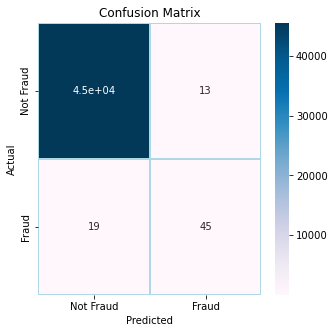

In [93]:
# confusion matrix
cm = pd.crosstab(y_valid, preds, rownames = ['Actual'], colnames = ['Predicted'])
fig, ax1 = plt.subplots(ncols = 1, figsize = (5, 5))
sns.heatmap(cm, xticklabels = ["Not Fraud", "Fraud"], yticklabels = ["Not Fraud", "Fraud"], annot = True, ax = ax1, linewidth = .2, linecolor = "Lightblue", cmap = "PuBu")
plt.title("Confusion Matrix")
plt.show()

In [94]:
# area under curve
roc_auc_score(y_valid, preds)

0.851419658554005

# CatBoost

In [95]:
clf = CatBoostClassifier(iterations = 500, learning_rate = 0.02, depth = 12,
                         eval_metric = "AUC", random_seed = 42, bagging_temperature = 0.2,
                         od_type = "Iter", metric_period = 50, od_wait = 100)

In [96]:
clf.fit(x_train, y_train, verbose = True)

0:	total: 1.86s	remaining: 15m 27s
50:	total: 1m	remaining: 8m 48s
100:	total: 2m 2s	remaining: 8m 2s
150:	total: 2m 56s	remaining: 6m 47s
200:	total: 3m 47s	remaining: 5m 38s
250:	total: 4m 39s	remaining: 4m 36s
300:	total: 5m 30s	remaining: 3m 38s
350:	total: 6m 22s	remaining: 2m 42s
400:	total: 7m 14s	remaining: 1m 47s
450:	total: 8m 5s	remaining: 52.7s
499:	total: 8m 54s	remaining: 0us


In [97]:
preds = clf.predict(x_valid)

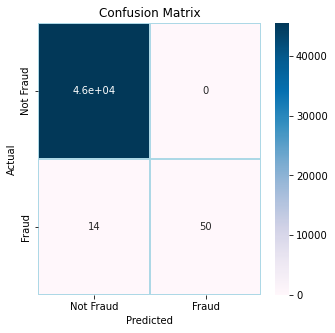

In [98]:
# confusion matrix
cm = pd.crosstab(y_valid, preds, rownames = ['Actual'], colnames = ['Predicted'])
fig, ax1 = plt.subplots(ncols = 1, figsize = (5, 5))
sns.heatmap(cm, xticklabels = ["Not Fraud", "Fraud"], yticklabels = ["Not Fraud", "Fraud"], annot = True, ax = ax1, linewidth = .2, linecolor = "Lightblue", cmap = "PuBu")
plt.title("Confusion Matrix")
plt.show()

In [99]:
# area under curve
roc_auc_score(y_valid, preds)

0.890625

# XGBoost

In [100]:
train = xgb.DMatrix(x_train, y_train)
valid = xgb.DMatrix(x_valid, y_valid)
test = xgb.DMatrix(x_test, y_test)

# what to monitor 
watchlist = [(train, 'train'), (valid, 'valid')]

# xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = 42

In [101]:
model = xgb.train(params, train, 1000, watchlist,
                  early_stopping_rounds = 50, maximize = True, verbose_eval = 50)

[16:54:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-auc:0.88014	valid-auc:0.87486
[50]	train-auc:0.91951	valid-auc:0.92951
[100]	train-auc:0.93605	valid-auc:0.93596
[150]	train-auc:0.97665	valid-auc:0.97069
[200]	train-auc:0.98816	valid-auc:0.98154
[214]	train-auc:0.98958	valid-auc:0.98045


In [102]:
preds = model.predict(test)

In [103]:
# area under curve
roc_auc_score(y_test, preds)


0.972840048723485

# LightGBM

In [104]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  
          'max_depth': 4,  
          'min_child_samples': 100,  
          'max_bin': 100,  
          'subsample': 0.9,  
          'subsample_freq': 1,  
          'colsample_bytree': 0.7,  
          'min_child_weight': 0,  
          'min_split_gain': 0,  
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':150, 
         }

In [105]:
train = lgb.Dataset(x_train.values, y_train, feature_name = predictors)
valid = lgb.Dataset(x_valid.values, y_valid, feature_name = predictors)
evals_result = {}

In [106]:
model = lgb.train(params, train, valid_sets = [train, valid],
                  valid_names = ['train', 'valid'], evals_result = evals_result,
                  num_boost_round = 1000, early_stopping_rounds = 100,
                  verbose_eval = 50, feval = None)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Training until validation scores don't improve for 100 rounds
[50]	train's auc: 0.987274	valid's auc: 0.894282
[100]	train's auc: 0.987737	valid's auc: 0.85291
Early stopping, best iteration is:
[1]	train's auc: 0.948018	valid's auc: 0.928341


In [107]:
preds = model.predict(x_test)

In [108]:
# area under curve
roc_auc_score(y_test, preds)

0.9319442271140308

# Results

* Random Forest: 0.88
* AdaBoost: 0.85
* CatBoost: 0.89
* XGBoost: 0.93
* LightGBM: 0.93